# Bootstrapping

This notebook introduces the concept of bootstrapping, provides a function for bootstrapping data, and then provides an example.

## Introduction

Data in the real-world tends to be chaotic, not always adhering to the neat pattern of a known and established probability distribution.  When attempting to model chaotic systems, however, it may be advantageous to accurately describe a data set probabilistically.  Bootstrapping is a process that supports us in this endeavor.

When we bootstrap a data set, we repeatedly take a sample of data points from the data set, perform a function (e.g., compute the mean), store the output of the function, and replace the sampled data points into the data set.  By performing this process many times, the computed outputs of each iteration incrementally combine to describe the sample distribution of the data set.  The sample distribution of mean student GPAs, for instance, provides insight into the probability associated with the mean when a subset of the student population is sampled.

The most useful aspect of the bootstrapping process comes from leveraging the Central Limit Theorem, which states that a population repeatedly sampled is guaranteed to yield a normally distributed sample distribution, regardless of the underlying distribution of the population itself.  Please note that the Central Limit Theorem is contingent on certain criteria, such as the independent nature of the sampling and the sufficiently large size of the samples.  It is very advantageous to be able to describe a chaotic data set using a normal distribution because of the many characteristics of a normal distribution that allow for quick analysis.

## Code

The below code performs a bootstrapping routine.  The function draw_bs_reps() inputs a dataset array, the function that you be performed on the samples (e.g., np.mean), and the number of samples you would like to bootstrap.  Within the function draw_bs_reps(), a second function is called; bootstrap_replicate().  The function bootstrap_replicate() is the part of the code that randomly selected data points from the set and executes the desired function.

In [4]:
import numpy as np

# The function bootstrap_replicate generates a 1-dimensional bootstrap replicate from a 1-dimensional array of data
# The function returns whatever operation is requested to be performed on the replicate, often np.mean
def bootstrap_replicate(data, func):
    replicate = np.random.choice(data, len(data))               # Randomly select data points; store as replicate
    return func(replicate)                                      # Perform the desired function on the replicate

# The function draw_bs_reps takes a 1-dimensional array of data and generates 'size' number of replicates
# The function returns an array of data that is gathered from each bootstrap replicate, determined by...
# ...func (often np.mean)
def draw_bs_reps(data, func, size = 10000):
    bs_replicates = np.empty(size)                              # Initializes array of replicate outputs
    for i in range(size):                                       # For "size" number of iterations...
        bs_replicates[i] = bootstrap_replicate(data, func)      # Call the above function and store output in array
    return bs_replicates

## Example

To demonstrate the bootstrapping technique, we will randomly generate a dataset of 500 data points.  Note this dataset is not normally distributed.  To generate the sample distribution for the dataset, we will call the function draw_bs_reps() and feed it an array of the 500 data points and the desired np.mean function.  The resulting array of sample mean will be normally distributed per the Central Limit Theorem, centered around the mean of 500 data points.  To accentuate the normal distribution of the bootstrapped sample means, a fit line is overlaid on the plot.

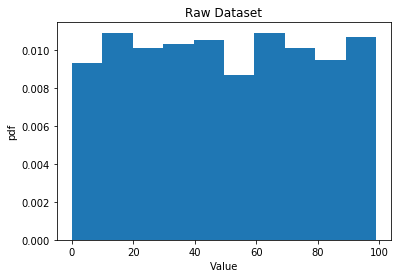

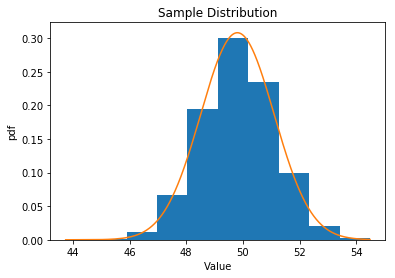

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randint(100, size = 500)                    # Randomly generate dataset

plt.hist(dataset, density = True)                               # Visualize the distribution of the dataset
plt.xlabel('Value')
plt.ylabel('pdf')
plt.title('Raw Dataset')
plt.show()

sample_means = draw_bs_reps(dataset, np.mean)                   # Bootstrap the dataset; sort outputs

sample_means.sort()
plt.hist(sample_means, density = True)                          # Visualize the sample distribution
fit = stats.norm.pdf(sample_means, np.mean(sample_means), np.std(sample_means))     # Generate normal curve
plt.plot(sample_means, fit, '-')                                # Visualize normal curve
plt.xlabel('Value')
plt.ylabel('pdf')
plt.title('Sample Distribution')
plt.show()